In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# variables to store mean and standard deviation for each feature
mu = []
std = []

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col= False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype= float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]

def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:, 0], y, 'bo')
    plt.show()

def normalize(data):
    for i in range(0, data.shape[1] -1):
        data[:, i] = (data[:, i] - np.mean(data[:, i])) / (np.std(data[:, i]))
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))

def h(x, theta):
    return np.matmul(x, theta)

def cost_function(x, y, theta):
    return (h(x, theta)- y).T@(h(x, theta) - y)/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate= 0.1, num_epochs = 10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m) * (x.T@(h_x - y))
        theta = theta - (learning_rate * cost_)
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_432\1386317325.py:1: SyntaxWarning: invalid escape sequence '\c'
  x, y = load_data('D:\coding\Machine-Learning\datasets\house_price_data.csv')


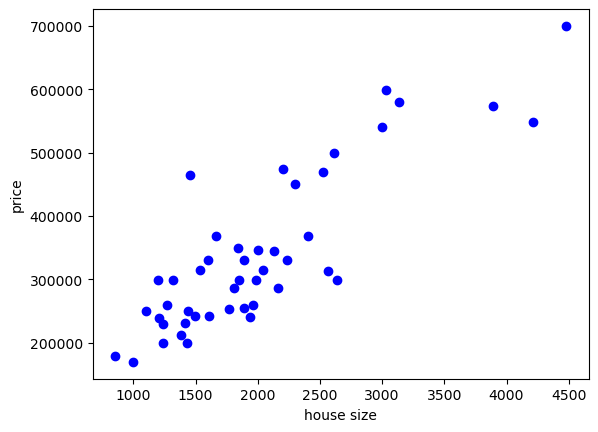

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [4]:
x, y = load_data('D:\coding\Machine-Learning\datasets\house_price_data.csv')

y = np.reshape(y,(46, 1))

#this adds a bias(intercept) term
x = np.hstack((np.ones((x.shape[0],1)), x))


theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)


In [6]:
theta

array([[ 3.37371711e+05],
       [ 1.04066024e+05],
       [-6.47874139e+01]])

In [21]:
x.shape, y.shape

((46, 2), (46, 1))

| Concept          | Purpose                                                         |
| ---------------- | --------------------------------------------------------------- |
| Normalization    | Makes training more efficient by scaling features               |
| Cost Function    | Measures how far predictions are from true values               |
| Gradient Descent | Learning algorithm to minimize cost function                    |
| Hypothesis (`h`) | Mathematical model that makes predictions                       |
| Epochs           | Number of times the model sees the full dataset during training |
| Learning Rate    | Controls how big each step is in the parameter update process   |
